In [1]:
# Import packages
import pandas as pd
import numpy as np

# Data preprocessing - Vote Results

[Vote Results Data Source: Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)

In [4]:
# Read dataset
df = pd.read_csv("data/vote_results/vote_results.csv")

In [5]:
df.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,AL GORE,DEMOCRAT,4942.0,17208.0,20191203,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993.0,17208.0,20191203,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,RALPH NADER,GREEN,160.0,17208.0,20191203,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,OTHER,OTHER,113.0,17208.0,20191203,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,AL GORE,DEMOCRAT,13997.0,56480.0,20191203,TOTAL


Vote results from 2000 to 2020 (county level)

In [6]:
# select 2020 vote results
df_20 = df[df['year']==2020]

In [7]:
df_20['candidate'].unique()

array(['JOSEPH R BIDEN JR', nan, 'DONALD J TRUMP', 'JO JORGENSEN',
       'JAMES G. "JESSE VENTURA" JANOS', 'BROCK PIERCE',
       'ROQUE "ROCKY" DE LA FUENTE', 'DON BLANKENSHIP',
       'PRINCESS KHADIJAH M JACOB-FAMBRO', 'PRESIDENT R BODDIE',
       'BRIAN CARROLL', 'JOSEPH KISHORE', 'GLORIA LA RIVA',
       'MARK CHARLES', 'KASEY WELLS', 'JORDAN "CANCER" SCOTT',
       'KANYE WEST', 'JOE MCHUGH', 'PHIL COLLINS', 'PHIL HUNTER',
       'BILL HAMMONS', 'ALYSON KENNEDY', 'TODD CELLA', 'SHAWN W. HOWARD',
       'JADE SIMMONS', 'MICHAEL LABOCH', 'ANGELA WALLS-WINDHAUSER',
       'ANDY WILLIAMS JR.', 'JAMES TIMOTHY STRUCK', 'DEBORAH ROUSE',
       'JEREMY HIGGS', 'ABRAM LOEB', 'RICKI SUE KING', 'TOM HOEFLING',
       'BLANK', 'SHEILA "SAMM" TITTLE', 'BARBARA BELLAR', 'DARIO HUNTER',
       'PAUL HODGES', 'DAVID A. MARTIN', 'VOID',
       'RICHARD CHARLES MONTANYE', 'WRITEIN', 'WRITE-IN',
       'PATRICK ODONNELL', 'DAVE MARX/ JOSH DOUBLEDAY', 'JIM DOUGLAS',
       'ROBERT WHITE', 'PETE BUT

In [8]:
# filter other candiates except Trump and Biden
df_can = df_20[df_20['candidate'].isin(['JOSEPH R BIDEN JR','DONALD J TRUMP'])]
df_can.head(10)
df_can.tail(10)

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
72597,2020,WYOMING,WY,SWEETWATER,56037.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,3823.0,16698.0,20210615,TOTAL
72600,2020,WYOMING,WY,SWEETWATER,56037.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,12229.0,16698.0,20210615,TOTAL
72601,2020,WYOMING,WY,TETON,56039.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,9848.0,14787.0,20210615,TOTAL
72604,2020,WYOMING,WY,TETON,56039.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,4341.0,14787.0,20210615,TOTAL
72605,2020,WYOMING,WY,UINTA,56041.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,1591.0,9459.0,20210615,TOTAL
72608,2020,WYOMING,WY,UINTA,56041.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,7496.0,9459.0,20210615,TOTAL
72609,2020,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,651.0,4032.0,20210615,TOTAL
72612,2020,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3245.0,4032.0,20210615,TOTAL
72613,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,360.0,3560.0,20210615,TOTAL
72616,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3107.0,3560.0,20210615,TOTAL


## Dealing with nan value

In [9]:
 df_can.isna().sum()

year              0
state             0
state_po          0
county_name       0
county_fips       4
office            0
candidate         0
party             0
candidatevotes    0
totalvotes        2
version           0
mode              0
dtype: int64

In [10]:
## nan value in county_fips

In [11]:
df_can[df_can['county_fips'].isna()]

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
53317,2020,DISTRICT OF COLUMBIA,DC,DISTRICT OF COLUMBIA,NaN,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,317323.0,344356.0,20210615,TOTAL
53321,2020,DISTRICT OF COLUMBIA,DC,DISTRICT OF COLUMBIA,NaN,PRESIDENT,DONALD J TRUMP,REPUBLICAN,18586.0,344356.0,20210615,TOTAL
63983,2020,RHODE ISLAND,RI,FEDERAL PRECINCT,NaN,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,1276.0,1374.0,20210615,TOTAL
63986,2020,RHODE ISLAND,RI,FEDERAL PRECINCT,NaN,PRESIDENT,DONALD J TRUMP,REPUBLICAN,85.0,1374.0,20210615,TOTAL


In [12]:
### update washington dc county fips : 11001  
df_can.loc[df_can['county_name']=='DISTRICT OF COLUMBIA',['county_fips']] = 11001.0

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


[FIPS Code Source](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697)

In [13]:
df_can.loc[df_can['county_name']=='DISTRICT OF COLUMBIA']

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
53317,2020,DISTRICT OF COLUMBIA,DC,DISTRICT OF COLUMBIA,11001.0,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,317323.0,344356.0,20210615,TOTAL
53321,2020,DISTRICT OF COLUMBIA,DC,DISTRICT OF COLUMBIA,11001.0,PRESIDENT,DONALD J TRUMP,REPUBLICAN,18586.0,344356.0,20210615,TOTAL


In [14]:
#### no official county fips for RHODE ISLAND, FEDERAL PRECINCT, RI 
### delete FEDERAL PRECINCT county rows 
df_can.dropna(subset=['county_fips'],inplace=True)

<ipython-input-14-f4a6c95c410f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_can.dropna(subset=['county_fips'],inplace=True)


In [15]:
df_can[df_can['county_fips'].isna()]

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode


In [16]:
## nan value in totalvotes
df_can[df_can['totalvotes'].isna()]

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
52845,2020,CALIFORNIA,CA,SAN JOAQUIN,6077.0,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,161137.0,NaN,20210615,TOTAL
52849,2020,CALIFORNIA,CA,SAN JOAQUIN,6077.0,PRESIDENT,DONALD J TRUMP,REPUBLICAN,121098.0,NaN,20210615,TOTAL


In [17]:
# Update SAN JOAQUIN total votes 
df_can.loc[df_can['county_name']=='SAN JOAQUIN',['totalvotes']] = 289781.0

[SAN JOAQUIN Vote Results Source](https://www.sjgov.org/WorkArea/DownloadAsset.aspx?id=33619)

In [18]:
df_can.loc[df_can['county_name']=='SAN JOAQUIN']

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
52845,2020,CALIFORNIA,CA,SAN JOAQUIN,6077.0,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,161137.0,289781.0,20210615,TOTAL
52849,2020,CALIFORNIA,CA,SAN JOAQUIN,6077.0,PRESIDENT,DONALD J TRUMP,REPUBLICAN,121098.0,289781.0,20210615,TOTAL


In [19]:
df_can.isna().sum()

year              0
state             0
state_po          0
county_name       0
county_fips       0
office            0
candidate         0
party             0
candidatevotes    0
totalvotes        0
version           0
mode              0
dtype: int64

## Squeezing 2 rows into 1 row for each county

In [20]:
# cumulative sum of candiatevotes for each county
df_votes = df_can.groupby(['county_fips','candidate'])['candidatevotes'].sum().reset_index()
df_votes

,county_fips,candidate,candidatevotes
0,1001.0,DONALD J TRUMP,19838.0
1,1001.0,JOSEPH R BIDEN JR,7503.0
2,1003.0,DONALD J TRUMP,83544.0
3,1003.0,JOSEPH R BIDEN JR,24578.0
4,1005.0,DONALD J TRUMP,5622.0
...,...,...,...
6303,56041.0,JOSEPH R BIDEN JR,1591.0
6304,56043.0,DONALD J TRUMP,3245.0
6305,56043.0,JOSEPH R BIDEN JR,651.0
6306,56045.0,DONALD J TRUMP,3107.0


In [21]:
# nan check
df_votes.isna().sum()

county_fips       0
candidate         0
candidatevotes    0
dtype: int64

In [22]:
# Trump Votes
df_votes_trump = df_votes[df_votes['candidate']=='DONALD J TRUMP'].reset_index(drop=True)
df_votes_trump.rename(columns={"candidatevotes": "candidatevotes_trump"},inplace=True)

In [23]:
# Biden Votes
df_votes_biden = df_votes[df_votes['candidate']=='JOSEPH R BIDEN JR'].reset_index(drop=True)
df_votes_biden.rename(columns={"candidatevotes": "candidatevotes_biden"},inplace=True)

In [24]:
df_votes_trump

,county_fips,candidate,candidatevotes_trump
0,1001.0,DONALD J TRUMP,19838.0
1,1003.0,DONALD J TRUMP,83544.0
2,1005.0,DONALD J TRUMP,5622.0
3,1007.0,DONALD J TRUMP,7525.0
4,1009.0,DONALD J TRUMP,24711.0
...,...,...,...
3149,56037.0,DONALD J TRUMP,12229.0
3150,56039.0,DONALD J TRUMP,4341.0
3151,56041.0,DONALD J TRUMP,7496.0
3152,56043.0,DONALD J TRUMP,3245.0


In [25]:
df_votes_biden

,county_fips,candidate,candidatevotes_biden
0,1001.0,JOSEPH R BIDEN JR,7503.0
1,1003.0,JOSEPH R BIDEN JR,24578.0
2,1005.0,JOSEPH R BIDEN JR,4816.0
3,1007.0,JOSEPH R BIDEN JR,1986.0
4,1009.0,JOSEPH R BIDEN JR,2640.0
...,...,...,...
3149,56037.0,JOSEPH R BIDEN JR,3823.0
3150,56039.0,JOSEPH R BIDEN JR,9848.0
3151,56041.0,JOSEPH R BIDEN JR,1591.0
3152,56043.0,JOSEPH R BIDEN JR,651.0


In [26]:
# shared part
df_index = df_can[['state','state_po','county_name','county_fips','totalvotes']].drop_duplicates().reset_index(drop=True)

In [27]:
df_index

,state,state_po,county_name,county_fips,totalvotes
0,ALABAMA,AL,AUTAUGA,1001.0,27770.0
1,ALABAMA,AL,BALDWIN,1003.0,109679.0
2,ALABAMA,AL,BARBOUR,1005.0,10518.0
3,ALABAMA,AL,BIBB,1007.0,9595.0
4,ALABAMA,AL,BLOUNT,1009.0,27588.0
...,...,...,...,...,...
3149,WYOMING,WY,SWEETWATER,56037.0,16698.0
3150,WYOMING,WY,TETON,56039.0,14787.0
3151,WYOMING,WY,UINTA,56041.0,9459.0
3152,WYOMING,WY,WASHAKIE,56043.0,4032.0


In [28]:
df_final = df_index.merge(df_votes_biden, on='county_fips').drop(columns=['candidate'])
df_final = df_final.merge(df_votes_trump, on='county_fips').drop(columns=['candidate'])

In [29]:
df_final['per_biden'] = df_final['candidatevotes_biden'] / df_final['totalvotes'] * 100
df_final['per_trump'] = df_final['candidatevotes_trump'] / df_final['totalvotes'] * 100

In [30]:
df_final

,state,state_po,county_name,county_fips,totalvotes,candidatevotes_biden,candidatevotes_trump,per_biden,per_trump
0,ALABAMA,AL,AUTAUGA,1001.0,27770.0,7503.0,19838.0,27.018365,71.436802
1,ALABAMA,AL,BALDWIN,1003.0,109679.0,24578.0,83544.0,22.409030,76.171373
2,ALABAMA,AL,BARBOUR,1005.0,10518.0,4816.0,5622.0,45.788173,53.451226
3,ALABAMA,AL,BIBB,1007.0,9595.0,1986.0,7525.0,20.698280,78.426264
4,ALABAMA,AL,BLOUNT,1009.0,27588.0,2640.0,24711.0,9.569378,89.571553
...,...,...,...,...,...,...,...,...,...
3149,WYOMING,WY,SWEETWATER,56037.0,16698.0,3823.0,12229.0,22.894957,73.236316
3150,WYOMING,WY,TETON,56039.0,14787.0,9848.0,4341.0,66.599040,29.356868
3151,WYOMING,WY,UINTA,56041.0,9459.0,1591.0,7496.0,16.819960,79.247278
3152,WYOMING,WY,WASHAKIE,56043.0,4032.0,651.0,3245.0,16.145833,80.481151


In [31]:
# Create new columns
## percentage difference (trump - biden)

df_final['per_diff'] = df_final['per_trump'] - df_final['per_biden']
df_final

,state,state_po,county_name,county_fips,totalvotes,candidatevotes_biden,candidatevotes_trump,per_biden,per_trump,per_diff
0,ALABAMA,AL,AUTAUGA,1001.0,27770.0,7503.0,19838.0,27.018365,71.436802,44.418437
1,ALABAMA,AL,BALDWIN,1003.0,109679.0,24578.0,83544.0,22.409030,76.171373,53.762343
2,ALABAMA,AL,BARBOUR,1005.0,10518.0,4816.0,5622.0,45.788173,53.451226,7.663054
3,ALABAMA,AL,BIBB,1007.0,9595.0,1986.0,7525.0,20.698280,78.426264,57.727983
4,ALABAMA,AL,BLOUNT,1009.0,27588.0,2640.0,24711.0,9.569378,89.571553,80.002175
...,...,...,...,...,...,...,...,...,...,...
3149,WYOMING,WY,SWEETWATER,56037.0,16698.0,3823.0,12229.0,22.894957,73.236316,50.341358
3150,WYOMING,WY,TETON,56039.0,14787.0,9848.0,4341.0,66.599040,29.356868,-37.242172
3151,WYOMING,WY,UINTA,56041.0,9459.0,1591.0,7496.0,16.819960,79.247278,62.427318
3152,WYOMING,WY,WASHAKIE,56043.0,4032.0,651.0,3245.0,16.145833,80.481151,64.335317


In [33]:
## abs percentage difference

df_final['abs_per_diff'] = abs(df_final['per_trump'] - df_final['per_biden'])

In [34]:
## biden win = 1 , biden lose = 0

df_final['winner'] = 1
df_final.loc[df_final['per_diff'] > 0, ['winner']] = 0

In [35]:
# Export the data
df_final.to_csv('data/vote_results/county_level_vote_results.csv')

# Data preprocessing - Vote & Registration

[Vote & Registeration Data Source: Census](https://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-585.html)

In [36]:
# first datset : vote_and_registeration_by_sex_and_race
# Note : This figure added to or subtracted from the estimate provides the 90-percent confidence interval.
df_sr = pd.read_excel('data/vote_and_registeration/by_sex_race.xlsx')

In [37]:
df_sr

,STATE,Age,Total population,Total citizen population,Total registered,Percent registered\n(Total),Margin of error 1 (Registered),Percent registered\n(Citizen),Margin of error 1 (Registered).1,Total voted,Percent voted\n(Total),Margin of error 1 (Voted),Percent voted\n(Citizen),Margin of error 1 (Voted).1
0,US,Total,252274,231593,168308,66.7,0.4,72.7,0.4,154628,61.3,0.4,66.8,0.4
1,US,Male,121870,111485,79340,65.1,0.5,71.2,0.5,72474,59.5,0.5,65,0.5
2,US,Female,130404,120108,88968,68.2,0.5,74.1,0.5,82154,63,0.5,68.4,0.5
3,US,White alone,195227,181891,134889,69.1,0.4,74.2,0.4,124301,63.7,0.4,68.3,0.4
4,US,White non-Hispanic alone,157442,154827,118389,75.2,0.4,76.5,0.4,109830,69.8,0.4,70.9,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,WYOMING,Asian alone,2,-,-,B,B,B,B,-,B,B,B,B
568,WYOMING,Hispanic (of any race),40,38,23,B,B,B,B,21,B,B,B,B
569,WYOMING,White alone or in combination,422,416,290,68.6,3.5,69.6,3.5,273,64.7,3.6,65.7,3.6
570,WYOMING,Black alone or in combination,4,3,3,B,B,B,B,3,B,B,B,B


## Squeezing multiple rows into 1 row for each state

In [38]:
## sex
df_sex = df_sr[df_sr['Age'].isin(['Male','Female'])]

In [39]:
# male
df_sex_m = df_sex[df_sex['Age']=='Male'].add_suffix('_male')
df_sex_m.drop(columns=['Age_male'],inplace=True)
df_sex_m.rename(columns={'STATE_male':'State'},inplace=True)

In [40]:
df_sex_m.head()

,State,Total population_male,Total citizen population_male,Total registered_male,Percent registered\n(Total)_male,Margin of error 1 (Registered)_male,Percent registered\n(Citizen)_male,Margin of error 1 (Registered).1_male,Total voted_male,Percent voted\n(Total)_male,Margin of error 1 (Voted)_male,Percent voted\n(Citizen)_male,Margin of error 1 (Voted).1_male
1,US,121870,111485,79340,65.1,0.5,71.2,0.5,72474,59.5,0.5,65,0.5
12,ALABAMA,1780,1755,1187,66.7,4.5,67.6,4.5,1038,58.4,4.8,59.2,4.8
23,ALASKA,269,264,195,72.6,4.4,74.1,4.4,165,61.4,4.8,62.6,4.8
34,ARIZONA,2739,2465,1784,65.1,3.8,72.4,3.7,1653,60.4,3.9,67.1,3.9
45,ARKANSAS,1101,1057,641,58.2,4.9,60.6,4.9,546,49.6,4.9,51.6,5


In [41]:
# female
df_sex_f = df_sex[df_sex['Age']=='Female'].add_suffix('_female')
df_sex_f.drop(columns=['Age_female'],inplace=True)
df_sex_f.rename(columns={'STATE_female':'State'},inplace=True)

In [42]:
df_sex_f.head()

,State,Total population_female,Total citizen population_female,Total registered_female,Percent registered\n(Total)_female,Margin of error 1 (Registered)_female,Percent registered\n(Citizen)_female,Margin of error 1 (Registered).1_female,Total voted_female,Percent voted\n(Total)_female,Margin of error 1 (Voted)_female,Percent voted\n(Citizen)_female,Margin of error 1 (Voted).1_female
2,US,130404,120108,88968,68.2,0.5,74.1,0.5,82154,63,0.5,68.4,0.5
13,ALABAMA,1990,1960,1340,67.3,4.3,68.4,4.3,1209,60.7,4.5,61.6,4.5
24,ALASKA,259,253,188,72.5,4.5,74.3,4.5,165,63.5,4.9,65.1,4.9
35,ARIZONA,2899,2610,2095,72.3,3.4,80.3,3.2,1996,68.9,3.5,76.5,3.4
46,ARKANSAS,1182,1138,720,60.9,4.6,63.3,4.7,640,54.1,4.7,56.2,4.8


In [43]:
# merge
df_sex = df_sex_f.merge(df_sex_m, on='State')

In [45]:
df_sex.head()

,State,Total population_female,Total citizen population_female,Total registered_female,Percent registered\n(Total)_female,Margin of error 1 (Registered)_female,Percent registered\n(Citizen)_female,Margin of error 1 (Registered).1_female,Total voted_female,Percent voted\n(Total)_female,...,Total registered_male,Percent registered\n(Total)_male,Margin of error 1 (Registered)_male,Percent registered\n(Citizen)_male,Margin of error 1 (Registered).1_male,Total voted_male,Percent voted\n(Total)_male,Margin of error 1 (Voted)_male,Percent voted\n(Citizen)_male,Margin of error 1 (Voted).1_male
0,US,130404,120108,88968,68.2,0.5,74.1,0.5,82154,63,...,79340,65.1,0.5,71.2,0.5,72474,59.5,0.5,65,0.5
1,ALABAMA,1990,1960,1340,67.3,4.3,68.4,4.3,1209,60.7,...,1187,66.7,4.5,67.6,4.5,1038,58.4,4.8,59.2,4.8
2,ALASKA,259,253,188,72.5,4.5,74.3,4.5,165,63.5,...,195,72.6,4.4,74.1,4.4,165,61.4,4.8,62.6,4.8
3,ARIZONA,2899,2610,2095,72.3,3.4,80.3,3.2,1996,68.9,...,1784,65.1,3.8,72.4,3.7,1653,60.4,3.9,67.1,3.9
4,ARKANSAS,1182,1138,720,60.9,4.6,63.3,4.7,640,54.1,...,641,58.2,4.9,60.6,4.9,546,49.6,4.9,51.6,5


In [46]:
## race
#'White alone'
df_race_wa = df_sr[df_sr['Age']=='White alone'].add_suffix('_white_alone')
df_race_wa.drop(columns=['Age_white_alone'],inplace=True)
df_race_wa.rename(columns={'STATE_white_alone':'State'},inplace=True)

In [47]:
df_race_wa.head()

,State,Total population_white_alone,Total citizen population_white_alone,Total registered_white_alone,Percent registered\n(Total)_white_alone,Margin of error 1 (Registered)_white_alone,Percent registered\n(Citizen)_white_alone,Margin of error 1 (Registered).1_white_alone,Total voted_white_alone,Percent voted\n(Total)_white_alone,Margin of error 1 (Voted)_white_alone,Percent voted\n(Citizen)_white_alone,Margin of error 1 (Voted).1_white_alone
3,US,195227,181891,134889,69.1,0.4,74.2,0.4,124301,63.7,0.4,68.3,0.4
14,ALABAMA,2657,2619,1860,70,3.6,71,3.6,1647,62,3.8,62.9,3.8
25,ALASKA,345,343,265,76.7,3.7,77.3,3.7,243,70.3,4,70.9,4
36,ARIZONA,4840,4365,3328,68.8,2.7,76.3,2.7,3152,65.1,2.8,72.2,2.8
47,ARKANSAS,1867,1808,1139,61,3.7,63,3.7,1014,54.3,3.8,56.1,3.8


In [48]:
#'White non-Hispanic alone'
df_race_wnh = df_sr[df_sr['Age']=='White non-Hispanic alone'].add_suffix('_white_nh')
df_race_wnh.drop(columns=['Age_white_nh'],inplace=True)
df_race_wnh.rename(columns={'STATE_white_nh':'State'},inplace=True)

In [49]:
df_race_wnh.head()

,State,Total population_white_nh,Total citizen population_white_nh,Total registered_white_nh,Percent registered\n(Total)_white_nh,Margin of error 1 (Registered)_white_nh,Percent registered\n(Citizen)_white_nh,Margin of error 1 (Registered).1_white_nh,Total voted_white_nh,Percent voted\n(Total)_white_nh,Margin of error 1 (Voted)_white_nh,Percent voted\n(Citizen)_white_nh,Margin of error 1 (Voted).1_white_nh
4,US,157442,154827,118389,75.2,0.4,76.5,0.4,109830,69.8,0.4,70.9,0.4
15,ALABAMA,2587,2569,1825,70.6,3.6,71,3.6,1617,62.5,3.9,63,3.9
26,ALASKA,325,323,251,77.2,3.8,77.5,3.8,230,70.6,4.1,71,4.1
37,ARIZONA,3140,3096,2480,79,3,80.1,3,2385,76,3.1,77,3.1
48,ARKANSAS,1744,1733,1111,63.7,3.8,64.1,3.8,988,56.7,3.9,57,3.9


In [50]:
#'Black alone'
df_race_ba = df_sr[df_sr['Age']=='Black alone'].add_suffix('_black_alone')
df_race_ba.drop(columns=['Age_black_alone'],inplace=True)
df_race_ba.rename(columns={'STATE_black_alone':'State'},inplace=True)

In [51]:
df_race_ba.head()

,State,Total population_black_alone,Total citizen population_black_alone,Total registered_black_alone,Percent registered\n(Total)_black_alone,Margin of error 1 (Registered)_black_alone,Percent registered\n(Citizen)_black_alone,Margin of error 1 (Registered).1_black_alone,Total voted_black_alone,Percent voted\n(Total)_black_alone,Margin of error 1 (Voted)_black_alone,Percent voted\n(Citizen)_black_alone,Margin of error 1 (Voted).1_black_alone
5,US,32219,30204,20844,64.7,1,69,1,18922,58.7,1,62.6,1
16,ALABAMA,973,973,590,60.6,6.1,60.6,6.1,533,54.8,6.2,54.8,6.2
27,ALASKA,17,16,11,B,B,B,B,8,B,B,B,B
38,ARIZONA,279,259,205,73.3,10.4,79.2,9.9,179,63.9,11.3,69.1,11.3
49,ARKANSAS,336,325,186,55.3,8.5,57.1,8.6,146,43.3,8.4,44.7,8.6


In [52]:
#'Asian alone'
df_race_aa = df_sr[df_sr['Age']=='Asian alone'].add_suffix('_asian_alone')
df_race_aa.drop(columns=['Age_asian_alone'],inplace=True)
df_race_aa.rename(columns={'STATE_asian_alone':'State'},inplace=True)

In [53]:
df_race_aa.head()

,State,Total population_asian_alone,Total citizen population_asian_alone,Total registered_asian_alone,Percent registered\n(Total)_asian_alone,Margin of error 1 (Registered)_asian_alone,Percent registered\n(Citizen)_asian_alone,Margin of error 1 (Registered).1_asian_alone,Total voted_asian_alone,Percent voted\n(Total)_asian_alone,Margin of error 1 (Voted)_asian_alone,Percent voted\n(Citizen)_asian_alone,Margin of error 1 (Voted).1_asian_alone
6,US,16094,11530,7354,45.7,1.5,63.8,1.7,6881,42.8,1.5,59.7,1.7
17,ALABAMA,55,45,23,B,B,B,B,21,B,B,B,B
28,ALASKA,35,27,18,B,B,B,B,17,B,B,B,B
39,ARIZONA,206,158,111,53.8,14.1,70.2,14.8,107,52,14.1,67.9,15.1
50,ARKANSAS,24,18,14,B,B,B,B,11,B,B,B,B


In [54]:
#'Hispanic (of any race)'
df_race_hs = df_sr[df_sr['Age']=='Hispanic (of any race)'].add_suffix('_hispanic')
df_race_hs.drop(columns=['Age_hispanic'],inplace=True)
df_race_hs.rename(columns={'STATE_hispanic':'State'},inplace=True)

In [55]:
df_race_hs.head()

,State,Total population_hispanic,Total citizen population_hispanic,Total registered_hispanic,Percent registered\n(Total)_hispanic,Margin of error 1 (Registered)_hispanic,Percent registered\n(Citizen)_hispanic,Margin of error 1 (Registered).1_hispanic,Total voted_hispanic,Percent voted\n(Total)_hispanic,Margin of error 1 (Voted)_hispanic,Percent voted\n(Citizen)_hispanic,Margin of error 1 (Voted).1_hispanic
7,US,42468,30627,18719,44.1,1,61.1,1.1,16459,38.8,0.9,53.7,1.1
18,ALABAMA,79,53,35,B,B,B,B,30,B,B,B,B
29,ALASKA,28,27,21,B,B,B,B,17,B,B,B,B
40,ARIZONA,1800,1340,895,49.7,5.1,66.8,5.5,814,45.2,5.1,60.8,5.8
51,ARKANSAS,134,83,30,22.6,12.4,36.4,18.1,29,21.4,12.1,34.6,17.9


In [56]:
# merge
df_race = df_race_wa.merge(df_race_wnh, on='State')
df_race = df_race.merge(df_race_ba, on='State')
df_race = df_race.merge(df_race_aa, on='State')
df_race = df_race.merge(df_race_hs, on='State')

df_race.head()

,State,Total population_white_alone,Total citizen population_white_alone,Total registered_white_alone,Percent registered\n(Total)_white_alone,Margin of error 1 (Registered)_white_alone,Percent registered\n(Citizen)_white_alone,Margin of error 1 (Registered).1_white_alone,Total voted_white_alone,Percent voted\n(Total)_white_alone,...,Total registered_hispanic,Percent registered\n(Total)_hispanic,Margin of error 1 (Registered)_hispanic,Percent registered\n(Citizen)_hispanic,Margin of error 1 (Registered).1_hispanic,Total voted_hispanic,Percent voted\n(Total)_hispanic,Margin of error 1 (Voted)_hispanic,Percent voted\n(Citizen)_hispanic,Margin of error 1 (Voted).1_hispanic
0,US,195227,181891,134889,69.1,0.4,74.2,0.4,124301,63.7,...,18719,44.1,1,61.1,1.1,16459,38.8,0.9,53.7,1.1
1,ALABAMA,2657,2619,1860,70,3.6,71,3.6,1647,62,...,35,B,B,B,B,30,B,B,B,B
2,ALASKA,345,343,265,76.7,3.7,77.3,3.7,243,70.3,...,21,B,B,B,B,17,B,B,B,B
3,ARIZONA,4840,4365,3328,68.8,2.7,76.3,2.7,3152,65.1,...,895,49.7,5.1,66.8,5.5,814,45.2,5.1,60.8,5.8
4,ARKANSAS,1867,1808,1139,61,3.7,63,3.7,1014,54.3,...,30,22.6,12.4,36.4,18.1,29,21.4,12.1,34.6,17.9


In [70]:
## age
df_age = pd.read_excel('data/vote_and_registeration/by_age.xlsx')

In [71]:
df_age['Age'].unique()

array(['Total', '18 to 24', '25 to 34', '35 to 44', '45 to 64', '65+'],
      dtype=object)

In [72]:
#'18 to 24'
df_age_18_24 = df_age[df_age['Age']=='18 to 24'].add_suffix('_18_24')
df_age_18_24.drop(columns=['Age_18_24'],inplace=True)
df_age_18_24.rename(columns={'STATE_18_24':'State'},inplace=True)

In [73]:
df_age_18_24.head()

,State,Total population_18_24,Total citizen population_18_24,Total registered_18_24,Percent registered\n(Total)_18_24,Margin of error 1 (Registered)_18_24,Percent registered\n(Citizen)_18_24,Margin of error 1 (Registered).1_18_24,Total voted_18_24,Percent voted\n(Total)_18_24,Margin of error 1 (Voted)_18_24,Percent voted\n(Citizen)_18_24,Margin of error 1 (Voted).1_18_24
1,US,28659,26737,15984,55.8,1.1,59.8,1.1,13752,48,1.1,51.4,1.2
7,ALABAMA,431,427,218,50.6,9.8,51.1,9.8,194,44.9,9.7,45.4,9.8
13,ALASKA,60,59,38,B,B,B,B,29,B,B,B,B
19,ARIZONA,653,629,371,56.7,8,59,8.1,327,50.1,8.1,52,8.2
25,ARKANSAS,263,261,127,48.3,10.1,48.7,10.1,84,32.1,9.4,32.3,9.5


In [74]:
#'25 to 34'
df_age_25_34 = df_age[df_age['Age']=='25 to 34'].add_suffix('_25_34')
df_age_25_34.drop(columns=['Age_25_34'],inplace=True)
df_age_25_34.rename(columns={'STATE_25_34':'State'},inplace=True)

In [75]:
df_age_25_34.head()

,State,Total population_25_34,Total citizen population_25_34,Total registered_25_34,Percent registered\n(Total)_25_34,Margin of error 1 (Registered)_25_34,Percent registered\n(Citizen)_25_34,Margin of error 1 (Registered).1_25_34,Total voted_25_34,Percent voted\n(Total)_25_34,Margin of error 1 (Voted)_25_34,Percent voted\n(Citizen)_25_34,Margin of error 1 (Voted).1_25_34
2,US,44871,39962,27351,61,0.9,68.4,0.9,24091,53.7,0.9,60.3,0.9
8,ALABAMA,599,587,376,62.8,8,64.2,8.1,315,52.6,8.3,53.7,8.4
14,ALASKA,97,94,59,60.7,8,63.1,8.1,41,41.9,8.1,43.6,8.3
20,ARIZONA,941,850,619,65.8,6.4,72.9,6.3,579,61.6,6.5,68.2,6.6
26,ARKANSAS,420,389,217,51.7,8,55.8,8.2,176,41.8,7.9,45.1,8.2


In [76]:
#'35 to 44'
df_age_35_44 = df_age[df_age['Age']=='35 to 44'].add_suffix('_35_44')
df_age_35_44.drop(columns=['Age_35_44'],inplace=True)
df_age_35_44.rename(columns={'STATE_35_44':'State'},inplace=True)

In [77]:
df_age_35_44.head()

,State,Total population_35_44,Total citizen population_35_44,Total registered_35_44,Percent registered\n(Total)_35_44,Margin of error 1 (Registered)_35_44,Percent registered\n(Citizen)_35_44,Margin of error 1 (Registered).1_35_44,Total voted_35_44,Percent voted\n(Total)_35_44,Margin of error 1 (Voted)_35_44,Percent voted\n(Citizen)_35_44,Margin of error 1 (Voted).1_35_44
3,US,41558,35977,25852,62.2,0.9,71.9,0.9,23421,56.4,0.9,65.1,1
9,ALABAMA,626,608,415,66.3,7.7,68.2,7.7,365,58.3,8,60,8.1
15,ALASKA,102,99,74,72.5,7.2,75.1,7.1,62,60.5,7.8,62.6,7.9
21,ARIZONA,929,756,565,60.8,6.6,74.6,6.5,509,54.8,6.7,67.3,7
27,ARKANSAS,341,319,201,58.8,8.7,63,8.8,179,52.6,8.8,56.3,9.1


In [78]:
#'45 to 64'
df_age_45_64 = df_age[df_age['Age']=='45 to 64'].add_suffix('_45_64')
df_age_45_64.drop(columns=['Age_45_64'],inplace=True)
df_age_45_64.rename(columns={'STATE_45_64':'State'},inplace=True)

In [79]:
df_age_45_64.head()

,State,Total population_45_64,Total citizen population_45_64,Total registered_45_64,Percent registered\n(Total)_45_64,Margin of error 1 (Registered)_45_64,Percent registered\n(Citizen)_45_64,Margin of error 1 (Registered).1_45_64,Total voted_45_64,Percent voted\n(Total)_45_64,Margin of error 1 (Voted)_45_64,Percent voted\n(Citizen)_45_64,Margin of error 1 (Voted).1_45_64
4,US,81912,75590,57226,69.9,0.6,75.7,0.6,53646,65.5,0.6,71,0.6
10,ALABAMA,1261,1246,900,71.4,5.2,72.2,5.2,824,65.4,5.4,66.2,5.5
16,ALASKA,177,174,141,79.8,4.9,80.9,4.8,131,73.9,5.4,75,5.3
22,ARIZONA,1833,1627,1301,70.9,4.4,79.9,4.1,1242,67.8,4.5,76.4,4.3
28,ARKANSAS,706,680,446,63.2,5.9,65.7,6,401,56.8,6.1,59,6.2


In [80]:
# '65+'
df_age_65 = df_age[df_age['Age']=='65+'].add_suffix('_65')
df_age_65.drop(columns=['Age_65'],inplace=True)
df_age_65.rename(columns={'STATE_65':'State'},inplace=True)

In [81]:
df_age_65.head()

,State,Total population_65,Total citizen population_65,Total registered_65,Percent registered\n(Total)_65,Margin of error 1 (Registered)_65,Percent registered\n(Citizen)_65,Margin of error 1 (Registered).1_65,Total voted_65,Percent voted\n(Total)_65,Margin of error 1 (Voted)_65,Percent voted\n(Citizen)_65,Margin of error 1 (Voted).1_65
5,US,55273,53326,41895,75.8,0.7,78.6,0.7,39718,71.9,0.7,74.5,0.7
11,ALABAMA,852,848,618,72.5,6.2,72.9,6.2,549,64.5,6.7,64.8,6.7
17,ALASKA,92,91,71,77,7.1,77.7,7.1,67,73,7.5,73.6,7.5
23,ARIZONA,1282,1213,1023,79.8,4.6,84.4,4.3,992,77.4,4.8,81.8,4.6
29,ARKANSAS,553,547,370,66.9,6.5,67.7,6.5,346,62.5,6.7,63.2,6.7


In [82]:
# merge
df_age = df_age_18_24.merge(df_age_25_34, on='State')
df_age = df_age.merge(df_age_35_44, on='State')
df_age = df_age.merge(df_age_45_64, on='State')
df_age = df_age.merge(df_age_65, on='State')


df_age.head()

,State,Total population_18_24,Total citizen population_18_24,Total registered_18_24,Percent registered\n(Total)_18_24,Margin of error 1 (Registered)_18_24,Percent registered\n(Citizen)_18_24,Margin of error 1 (Registered).1_18_24,Total voted_18_24,Percent voted\n(Total)_18_24,...,Total registered_65,Percent registered\n(Total)_65,Margin of error 1 (Registered)_65,Percent registered\n(Citizen)_65,Margin of error 1 (Registered).1_65,Total voted_65,Percent voted\n(Total)_65,Margin of error 1 (Voted)_65,Percent voted\n(Citizen)_65,Margin of error 1 (Voted).1_65
0,US,28659,26737,15984,55.8,1.1,59.8,1.1,13752,48,...,41895,75.8,0.7,78.6,0.7,39718,71.9,0.7,74.5,0.7
1,ALABAMA,431,427,218,50.6,9.8,51.1,9.8,194,44.9,...,618,72.5,6.2,72.9,6.2,549,64.5,6.7,64.8,6.7
2,ALASKA,60,59,38,B,B,B,B,29,B,...,71,77,7.1,77.7,7.1,67,73,7.5,73.6,7.5
3,ARIZONA,653,629,371,56.7,8,59,8.1,327,50.1,...,1023,79.8,4.6,84.4,4.3,992,77.4,4.8,81.8,4.6
4,ARKANSAS,263,261,127,48.3,10.1,48.7,10.1,84,32.1,...,370,66.9,6.5,67.7,6.5,346,62.5,6.7,63.2,6.7


In [83]:
## vote_and_registeration_total
df_total = pd.read_excel('data/vote_and_registeration/by_age.xlsx')

In [84]:
df_total = df_total[df_total['Age'] == 'Total']

In [85]:
df_total = df_total.add_suffix('_total')
df_total.drop(columns=['Age_total'],inplace=True)
df_total.rename(columns={'STATE_total':'State'},inplace=True)

In [86]:
df_total.head()

,State,Total population_total,Total citizen population_total,Total registered_total,Percent registered\n(Total)_total,Margin of error 1 (Registered)_total,Percent registered\n(Citizen)_total,Margin of error 1 (Registered).1_total,Total voted_total,Percent voted\n(Total)_total,Margin of error 1 (Voted)_total,Percent voted\n(Citizen)_total,Margin of error 1 (Voted).1_total
0,US,252274,231593,168308,66.7,0.4,72.7,0.4,154628,61.3,0.4,66.8,0.4
6,ALABAMA,3769,3716,2527,67,3.1,68,3.1,2247,59.6,3.3,60.5,3.3
12,ALASKA,528,516,383,72.6,3.2,74.2,3.1,330,62.4,3.4,63.8,3.4
18,ARIZONA,5638,5075,3878,68.8,2.5,76.4,2.5,3649,64.7,2.6,71.9,2.6
24,ARKANSAS,2283,2195,1361,59.6,3.4,62,3.4,1186,51.9,3.4,54,3.5


In [87]:
### Merge df total/age/race/sex
df_final = df_total.merge(df_race, on='State')
df_final = df_final.merge(df_age, on='State')
df_final = df_final.merge(df_sex, on='State')

df_final.head()

,State,Total population_total,Total citizen population_total,Total registered_total,Percent registered\n(Total)_total,Margin of error 1 (Registered)_total,Percent registered\n(Citizen)_total,Margin of error 1 (Registered).1_total,Total voted_total,Percent voted\n(Total)_total,...,Total registered_male,Percent registered\n(Total)_male,Margin of error 1 (Registered)_male,Percent registered\n(Citizen)_male,Margin of error 1 (Registered).1_male,Total voted_male,Percent voted\n(Total)_male,Margin of error 1 (Voted)_male,Percent voted\n(Citizen)_male,Margin of error 1 (Voted).1_male
0,US,252274,231593,168308,66.7,0.4,72.7,0.4,154628,61.3,...,79340,65.1,0.5,71.2,0.5,72474,59.5,0.5,65,0.5
1,ALABAMA,3769,3716,2527,67,3.1,68,3.1,2247,59.6,...,1187,66.7,4.5,67.6,4.5,1038,58.4,4.8,59.2,4.8
2,ALASKA,528,516,383,72.6,3.2,74.2,3.1,330,62.4,...,195,72.6,4.4,74.1,4.4,165,61.4,4.8,62.6,4.8
3,ARIZONA,5638,5075,3878,68.8,2.5,76.4,2.5,3649,64.7,...,1784,65.1,3.8,72.4,3.7,1653,60.4,3.9,67.1,3.9
4,ARKANSAS,2283,2195,1361,59.6,3.4,62,3.4,1186,51.9,...,641,58.2,4.9,60.6,4.9,546,49.6,4.9,51.6,5


In [89]:
# there are some space in column names
# remove those spaces
df_final.rename(columns=dict(zip(df_final.columns.tolist(),[i.replace('\n','') for i in df_final.columns.tolist()])),inplace=True)

### Dealing with Non numeric values 

A dash '-' represents zero or rounds to zero. --> change - into 0  
The symbol B means that the base is less than 75,000 and therefore too small to show the derived measure.

In [91]:
# See how many B for each columns
cols = df_final.columns

for col in cols[1:]:
    count = df_final[col].astype(str).str.contains('B').sum()
    if count >= 1 :
        print(col)
        print(count)

Percent registered(Total)_black_alone
15
Margin of error 1 (Registered)_black_alone
15
Percent registered(Citizen)_black_alone
15
Margin of error 1 (Registered).1_black_alone
15
Percent voted(Total)_black_alone
15
Margin of error 1 (Voted)_black_alone
15
Percent voted(Citizen)_black_alone
15
Margin of error 1 (Voted).1_black_alone
15
Percent registered(Total)_asian_alone
28
Margin of error 1 (Registered)_asian_alone
28
Percent registered(Citizen)_asian_alone
28
Margin of error 1 (Registered).1_asian_alone
28
Percent voted(Total)_asian_alone
28
Margin of error 1 (Voted)_asian_alone
28
Percent voted(Citizen)_asian_alone
28
Margin of error 1 (Voted).1_asian_alone
28
Percent registered(Total)_hispanic
17
Margin of error 1 (Registered)_hispanic
17
Percent registered(Citizen)_hispanic
17
Margin of error 1 (Registered).1_hispanic
17
Percent voted(Total)_hispanic
17
Margin of error 1 (Voted)_hispanic
17
Percent voted(Citizen)_hispanic
17
Margin of error 1 (Voted).1_hispanic
17
Percent register

--- Race   
1. Black alone : 15 counties ; There are 15 counties where the number of black people is less than 75,000 (thousands) 
2. Asian alone : 28 counties   
3. Hispanic : 17 counties  
  
-> too many cells are blank -> delete the columns containing B  
      
--- Age  
1. 18-24 : 5 counties ; There are 5 counties where the number of people between 18 and 24 is less than 75,000 (thousands) 
2. 25-34 : 1 counties  
3. 35-44 : 2 counties  
  
-> impute the average value (percentage, margin of error)  

In [92]:
# delete columns 
cols = df_final.columns

for col in cols:
    count = df_final[col].astype(str).str.contains('B').sum()
    if count >= 15 :
        df_final.drop(col, axis=1, inplace=True)
        print(col)

Percent registered(Total)_black_alone
Margin of error 1 (Registered)_black_alone
Percent registered(Citizen)_black_alone
Margin of error 1 (Registered).1_black_alone
Percent voted(Total)_black_alone
Margin of error 1 (Voted)_black_alone
Percent voted(Citizen)_black_alone
Margin of error 1 (Voted).1_black_alone
Percent registered(Total)_asian_alone
Margin of error 1 (Registered)_asian_alone
Percent registered(Citizen)_asian_alone
Margin of error 1 (Registered).1_asian_alone
Percent voted(Total)_asian_alone
Margin of error 1 (Voted)_asian_alone
Percent voted(Citizen)_asian_alone
Margin of error 1 (Voted).1_asian_alone
Percent registered(Total)_hispanic
Margin of error 1 (Registered)_hispanic
Percent registered(Citizen)_hispanic
Margin of error 1 (Registered).1_hispanic
Percent voted(Total)_hispanic
Margin of error 1 (Voted)_hispanic
Percent voted(Citizen)_hispanic
Margin of error 1 (Voted).1_hispanic


In [93]:
# impute averages
cols = df_final.columns

for col in cols[1:]:
    count = df_final[col].astype(str).str.contains('B').sum()
    if count >= 1:
        print(col,count)
        full_list = df_final[col].tolist()
        del_list = [i for i in full_list if i != 'B']
        mean = np.mean(del_list)
        df_final.loc[df_final[col]=='B',[col]] = mean
        
        
        print(col, count, mean)

Percent registered(Total)_18_24 5
Percent registered(Total)_18_24 5 56.47659574468084
Margin of error 1 (Registered)_18_24 5
Margin of error 1 (Registered)_18_24 5 8.425531914893616
Percent registered(Citizen)_18_24 5
Percent registered(Citizen)_18_24 5 59.68936170212765
Margin of error 1 (Registered).1_18_24 5
Margin of error 1 (Registered).1_18_24 5 8.536170212765958
Percent voted(Total)_18_24 5
Percent voted(Total)_18_24 5 48.46170212765957
Margin of error 1 (Voted)_18_24 5
Margin of error 1 (Voted)_18_24 5 8.480851063829787
Percent voted(Citizen)_18_24 5
Percent voted(Citizen)_18_24 5 51.231914893617024
Margin of error 1 (Voted).1_18_24 5
Margin of error 1 (Voted).1_18_24 5 8.687234042553193
Percent registered(Total)_25_34 1
Percent registered(Total)_25_34 1 63.09019607843137
Margin of error 1 (Registered)_25_34 1
Margin of error 1 (Registered)_25_34 1 6.696078431372549
Percent registered(Citizen)_25_34 1
Percent registered(Citizen)_25_34 1 68.64313725490196
Margin of error 1 (Regi

In [94]:
# impute 0 in -
cols = df_final.columns

for col in cols[1:]:
    count = df_final[col].astype(str).str.contains('-').sum()
    if count >= 1:
        df_final.loc[df_final[col]=='-',[col]] = 0
        
        
        print(col, count)

Total citizen population_asian_alone 1
Total registered_asian_alone 1
Total voted_asian_alone 1


In [95]:
df_final.isna().sum()

State                               0
Total population_total              0
Total citizen population_total      0
Total registered_total              0
Percent registered(Total)_total     0
                                   ..
Total voted_male                    0
Percent voted(Total)_male           0
Margin of error 1 (Voted)_male      0
Percent voted(Citizen)_male         0
Margin of error 1 (Voted).1_male    0
Length: 133, dtype: int64

In [96]:
df_final.to_csv('data/vote_and_registeration/state_level_vote_registeration_by_sex_age_race.csv')

### Merge three dataset

- Vote results (county level)
- Vaccine hesitancy data (county level)
- Vote and registeration data by race, age and sex(state level)

In [97]:
# import dataset
df_res = pd.read_csv('data/vote_results/county_level_vote_results.csv')
df_reg = pd.read_csv('data/vote_and_registeration/state_level_vote_registeration_by_sex_age_race.csv')
df_vac = pd.read_csv('data/vaccine_hesitancy.csv')

In [98]:
#nan check
df_vac.isna().sum()

FIPS Code                                                             0
County Name                                                           0
State                                                                 0
Estimated hesitant                                                    0
Estimated hesitant or unsure                                          0
Estimated strongly hesitant                                           0
Social Vulnerability Index (SVI)                                      1
SVI Category                                                          1
CVAC level of concern for vaccination rollout                         0
CVAC Level Of Concern                                                 0
Percent adults fully vaccinated against COVID-19 (as of 6/10/21)    278
State Code                                                            0
dtype: int64

In [102]:
# discrepancy in the FIPS numbers
res_set = set(df_res['county_fips'].unique())
vac_set = set(df_vac['FIPS Code'].unique())

In [100]:
!pip install matplotlib_venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32067 sha256=f8fbc6c73c02cd8d8c520ab0ce14735a1ddf9fa8e6c65db1cbea1901a00ca0ea
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\82\e4\64\dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
Successfully built matplotlib-venn


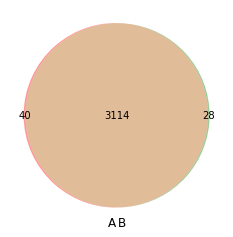

In [101]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
venn2([res_set,vac_set])

In [103]:
# fips codes that vote results dataset have but vaccination hesitancy dataset doesn't
len(res_set.difference(vac_set))


40

In [104]:
# the opposite
len(vac_set.difference(res_set))

28

In [105]:
# left merge ready
df_res = df_res.drop(columns=['Unnamed: 0'])
df_res.rename(columns={'county_fips':'FIPS Code'},inplace=True)
df_res['FIPS Code'] = df_res['FIPS Code'].astype(int)
df_mer = df_vac.merge(df_res,on=['FIPS Code'], how='left')

In [106]:
len(df_mer)

3142

In [107]:
# left merge
df_mer = df_mer.merge(df_reg,on=['State'],how='left')

In [108]:
df_mer

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Total registered_male,Percent registered(Total)_male,Margin of error 1 (Registered)_male,Percent registered(Citizen)_male,Margin of error 1 (Registered).1_male,Total voted_male,Percent voted(Total)_male,Margin of error 1 (Voted)_male,Percent voted(Citizen)_male,Margin of error 1 (Voted).1_male
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,1187,66.7,4.5,67.6,4.5,1038,58.4,4.8,59.2,4.8
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,1187,66.7,4.5,67.6,4.5,1038,58.4,4.8,59.2,4.8
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,1187,66.7,4.5,67.6,4.5,1038,58.4,4.8,59.2,4.8
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,1187,66.7,4.5,67.6,4.5,1038,58.4,4.8,59.2,4.8
4,1133,"Winston County, Alabama",ALABAMA,0.1805,0.2313,0.1379,0.70,High Vulnerability,0.80,High Concern,...,1187,66.7,4.5,67.6,4.5,1038,58.4,4.8,59.2,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,55079,"Milwaukee County, Wisconsin",WISCONSIN,0.1505,0.2144,0.0880,0.81,Very High Vulnerability,0.30,Low Concern,...,1616,72.7,3.9,74.9,3.8,1533,68.9,4.0,71.0,4.0
3138,55121,"Trempealeau County, Wisconsin",WISCONSIN,0.1611,0.2126,0.0959,0.28,Low Vulnerability,0.31,Low Concern,...,1616,72.7,3.9,74.9,3.8,1533,68.9,4.0,71.0,4.0
3139,56001,"Albany County, Wyoming",WYOMING,0.1949,0.2673,0.1405,0.25,Low Vulnerability,0.63,High Concern,...,141,65.0,5.0,66.5,5.0,132,61.1,5.1,62.5,5.1
3140,55067,"Langlade County, Wisconsin",WISCONSIN,0.1518,0.2007,0.0906,0.35,Low Vulnerability,0.19,Very Low Concern,...,1616,72.7,3.9,74.9,3.8,1533,68.9,4.0,71.0,4.0


In [109]:
# nan check
df_mer.isna().sum()

FIPS Code                           0
County Name                         0
State                               0
Estimated hesitant                  0
Estimated hesitant or unsure        0
                                   ..
Total voted_male                    0
Percent voted(Total)_male           0
Margin of error 1 (Voted)_male      0
Percent voted(Citizen)_male         0
Margin of error 1 (Voted).1_male    0
Length: 156, dtype: int64

In [110]:
df_mer.to_csv('data/merged.csv')